In [8]:
import sys
sys.path.append('/Users/pradithaalwis/Projects/University of Peradeniya/LBCAM')
from utils.dataloader import dtLoader
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [3]:
source = "/Users/pradithaalwis/Projects/University of Peradeniya/Fetal Mov Data/Ward/"
drop_zero_path = "/Users/pradithaalwis/Projects/University of Peradeniya/Fetal Mov Data//Randomly_Dropped_Windows/"
sensors = ['ax1', 'ay1', 'az1', 'ax2', 'ay2', 'az2', 'ax3', 'ay3', 'az3', 'ax4', 'ay4', 'az4']
sample_freq = 32

# Stride in seconds
stride = 1

# Window length in seconds
window_length = 8

# Safety margin in seconds
front_margin = 2
rear_margin = 2

In [4]:
"""
Splits the signals into windows
Args:
    SOURCE          : path to the sensor data
    SAMPLE_FREQ     : sample frequency of sensors
    STRIDE          : stride used for windowing (in seconds)
    WINDOW_LENGTH   : length of the required window in seconds
    FRONT_MARGIN    : Required offset before a fetal kick (in seconds)
    REAR_MARGIN     : Required offset after a fetal kick (in seconds)
"""
dataloader = dtLoader(SOURCE=source,
                        SAMPLE_FREQ=sample_freq,
                        STRIDE=stride,
                        WINDOW_LENGTH=window_length,
                        FRONT_MARGIN=front_margin,
                        REAR_MARGIN=rear_margin,
                        SENSORS=sensors)

In [5]:
"""
Args:
Returns:
    self.window_list            : Set of generated windows
    self.kick_count_list        : Number of kicks in each window
    counts                      : Dictionary containing number of windows                             with the given number of kicks
"""
counts = dataloader.split_windows()

--------------------------------------------------------------------------------
These are the list of files in the source directory.
['W17_R1.csv', 'W09_R1.csv', 'W05_R1.csv', 'W21_R1.csv', 'W05_R2.csv', 'W21_R2.csv', 'W15_R2.csv', 'W19_R1.csv', 'W07_R1.csv', 'W15_R1.csv', 'W23_R1.csv', 'W11_R3.csv', 'W27_R2.csv', 'W11_R2.csv', 'W27_R1.csv', 'W11_R1.csv', 'W03_R1.csv', 'W25_R1.csv', 'W11_R5.csv', 'W29_R1.csv', 'W01_R1.csv', 'W11_R4.csv', 'W13_R1.csv', 'W25_R2.csv', 'W29_R2.csv', 'W29_R3.csv', 'W25_R3.csv', 'W04_R2.csv', 'W20_R1.csv', 'W08_R1.csv', 'W16_R1.csv', 'W04_R1.csv', 'W22_R1.csv', 'W30_R1.csv', 'W06_R1.csv', 'W18_R1.csv', 'W14_R1.csv', 'W22_R2.csv', 'W10_R1.csv', 'W02_R1.csv', 'W26_R1.csv', 'W24_R3.csv', 'W24_R2.csv', 'W12_R1.csv', 'W24_R1.csv', 'W28_R1.csv']
--------------------------------------------------------------------------------
Length of dataframe :  1286  seconds
W17_R1.csv has been processed
Length of dataframe :  1263  seconds
W09_R1.csv has been processed
Length

In [6]:
window_list, num_kick_list = dataloader.drop_zero_kicks(counts[0] - counts[1], drop_zero_path)

In [13]:
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(window_list[0][2], widths, 'cmor', sampling_period=32, method='fft')
cwtmatr = np.abs(cwtmatr[:-1, :-1])

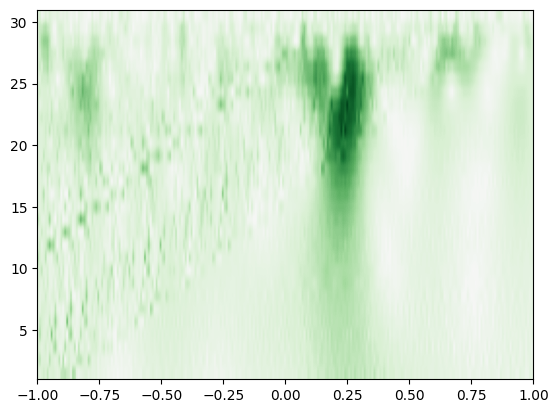

In [14]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [15]:
def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency

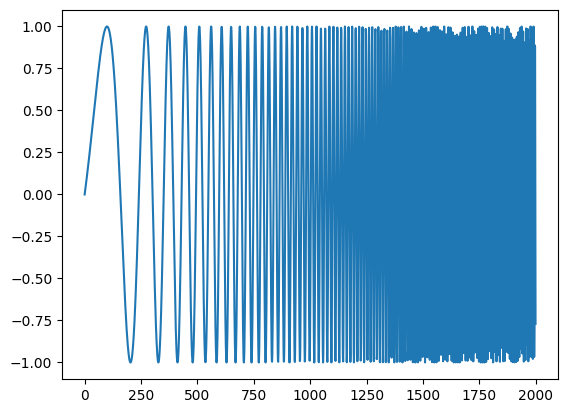

In [37]:
time = np.linspace(0, 1, 2000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
plt.plot(chirp1)
sampling_period = np.diff(time).mean()

In [26]:
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(chirp1, widths, 'cmor', sampling_period=sampling_period, method='fft')
cwtmatr = np.abs(cwtmatr[:-1, :-1])

/Users/pradithaalwis/miniconda3/envs/fyp/lib/python3.10/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


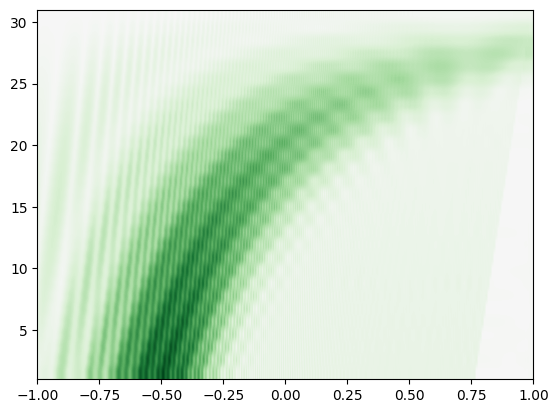

In [27]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [28]:
# Since breathing patterns are observed in the low scales, we can drop them. Or else we can increase the center frequency. Slightly higher bandwidth will help to capture fetal movements.

In [29]:
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(chirp1, widths, 'cmor1.5-1.5', sampling_period=sampling_period, method='fft')
cwtmatr = np.abs(cwtmatr[:-1, :-1])

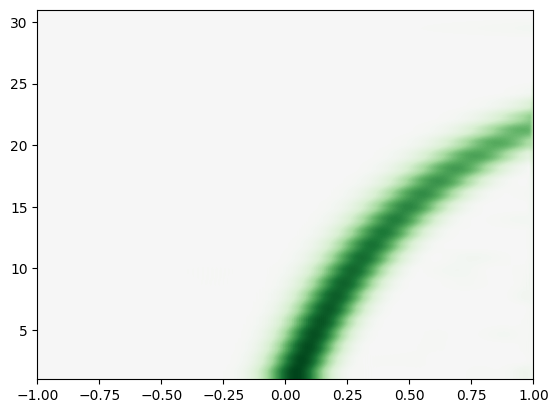

In [30]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [62]:
dt = 1 / 32
frequencies = pywt.scale2frequency('cmor0.5-0.5', [i for i in range(1, 32)]) / dt

In [63]:
print(frequencies)

[16.          8.          5.33333333  4.          3.2         2.66666667
  2.28571429  2.          1.77777778  1.6         1.45454545  1.33333333
  1.23076923  1.14285714  1.06666667  1.          0.94117647  0.88888889
  0.84210526  0.8         0.76190476  0.72727273  0.69565217  0.66666667
  0.64        0.61538462  0.59259259  0.57142857  0.55172414  0.53333333
  0.51612903]
